# **Importing Library**

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import eigh
import seaborn as sn
import random
import math
import gzip
import struct
from array import array
from os.path  import join
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import preprocessing
from scipy.stats import multivariate_normal
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from autograd import numpy as np
from autograd import grad

# **Generate 1000 multivariate gaussian points**

In [ ]:
mean = [0,0,0]
cov = [[1,0.8,0.8],[0.8,1,0.8],[0.8,0.8,1]]

In [ ]:
np.random.seed(0)
x = np.random.multivariate_normal(mean,cov,1000)

In [ ]:
x.shape

(1000, 3)

# **Normalize the data so that value in each dimension lies in [0,1] and a sigmoid can be used in the output layer.**

In [ ]:

normalized_x = 1/(1 + np.exp(-x))   #sigmoid normalization

In [ ]:
normalized_x

array([[0.21672429, 0.12482878, 0.15519875],
       [0.07995126, 0.07597702, 0.21129141],
       [0.28451506, 0.30623601, 0.28628367],
       ...,
       [0.78109511, 0.7381197 , 0.79107501],
       [0.34767081, 0.31222299, 0.62837217],
       [0.53735232, 0.64043782, 0.45274214]])

# **Take 800 samples for training and call the remaining samples test set.**

In [ ]:
x_train = normalized_x[:800]
x_test = normalized_x[800:]

In [ ]:
len(x_train)

800

# **Implement an autoencoder with one input layer, one hidden layer, and one output layer. Train the model using data generated in part 1.**

In [ ]:
def print_graph(x, y, num):
  lst = []
  for i in range(num):
    lst.append(i)
  plt.plot(lst,x,'red',label="Train Loss")
  plt.plot(lst,y,'blue',label="Test Loss")
  plt.xlabel("Number of iterations/epochs")
  plt.ylabel("Losses")
  plt.legend()
  plt.show()

In [ ]:
def print_loss(x,y,num):
  for i in range(num):
    print(f"train loss : {x[i]} , test_loss : {y[i]}")


In [ ]:
#sigmoid 
def sigmoid(x):
  z = 1/(1 + np.exp(-x))
  return z

#derivative of sigmoid
def sigmoid_dev(x):
  z = sigmoid(x)
  return (z*(1-z))




In [ ]:
def update_weights(W,w,b,c,i,n):
  a1 = np.dot(i,W)+b  #1x2
  #print("a1",a1.shape)
  h = sigmoid(a1) #1x2
  #print("h",h.shape)
  a2 = np.dot(h,w)+c #1x3
  #print("a2",a2.shape)
  x = sigmoid(a2)  #1x3
  #print("x",x.shape)
  diff = (1-sigmoid(a2))
  t = np.dot(sigmoid(a2),diff.T)
  a2 = np.reshape(a2,(-1,3))
  e_a2 = t*(i-x)*(-2)   #1x3
  #print("e_a2",e_a2.shape)
  h = np.reshape(h, (-1, 2))
  e_a2 = np.reshape(e_a2,(-1,3)) 
  ww = w-n*np.dot(h.T,e_a2)   #2x3
  #print("ww",ww.shape)
  cc = c-n*e_a2 #1x3
  #print("c",cc.shape)
  h = np.reshape(h,(2,-1))
  e_h = np.dot(w,e_a2.T)  #2x1
  #print("e_h",e_h.shape)
  diff1 = (1-sigmoid(a1))
  t1 = np.dot(sigmoid(a1),diff1.T)
  a1 = np.reshape(a1,(-1,2))
  e_a1 = t1*e_h.T   #1x2
  #print("e_a1",e_a1.shape)
  i = np.reshape(i,(-1,3))
  WW = W-n*(i.T*e_a1)  #3x2
  #print("WW",WW.shape)
  bb = b - e_a1  #1X2
  #print("bb",bb.shape)
  return WW,ww,bb,cc


# i = x_train[0]
# W,w,b,c = update_weights(W,w,b,c,i,n)


In [ ]:
def forward_backward_pass(W,w,b,c,n,i):
  a1 = np.dot(i,W)+b  #1x2
  h = sigmoid(a1) #1x2
  a2 = np.dot(h,w)+c #1x3
  x = sigmoid(a2)  #1x3
  diff = (-2)*(i-x)
  t = sigmoid_dev(a2)
  e_a2 = t*diff #1x3
  h = np.reshape(h, (-1, 2))
  e_a2 = np.reshape(e_a2,(-1,3)) 
  ww = w-n*np.dot(h.T,e_a2)   #2x3
  cc = c-n*e_a2 #1x3
  h = np.reshape(h,(2,-1))
  e_h = np.dot(w,e_a2.T)  #2x1
  t1 = sigmoid_dev(a1)
  a1 = np.reshape(a1,(-1,2))
  e_a1 = t1*e_h.T   #1x2
  i = np.reshape(i,(-1,3))
  WW = W-n*(i.T*e_a1)  #3x2
  bb = b-n*e_a1  #1X2
  return WW,ww,bb,cc,x




In [ ]:
def forward_pass(W,w,b,c,i):
  a1 = np.dot(i,W)+b  #1x2
  h = sigmoid(a1) #1x2
  a2 = np.dot(h,w)+c #1x3
  x = sigmoid(a2)  #1x3
  return a1,h,a2,x


In [ ]:
def cal_test_train_loss(W,w,b,c,x_train,x_test,epochs,n):
  train = []
  test = []
  for j in range(epochs):
    train_loss = 0.0
    test_loss = 0.0
    for i in x_train:
      i = np.reshape(i,(-1,3))
      W,w,b,c,x = forward_backward_pass(W,w,b,c,n,i)
      train_loss += np.sum((i-x)**2)
    train.append(train_loss)

   
    for k in x_test:
      k = np.reshape(k,(-1,3))
      a1,h,a2,x = forward_pass(W,w,b,c,k)
      test_loss += np.sum((k-x)**2)
    test.append(test_loss)

  return train,test


train loss : 100.59466248540429 , test_loss : 22.71415480202921
train loss : 100.52536459217379 , test_loss : 22.692330572198063
train loss : 100.29279664996415 , test_loss : 22.5748927662136
train loss : 99.04562742780318 , test_loss : 22.01132839064522
train loss : 94.14569263006123 , test_loss : 20.187099796321792
train loss : 80.98573672219159 , test_loss : 15.891535430230356
train loss : 56.28835968449856 , test_loss : 9.659844880851074
train loss : 32.49919078514522 , test_loss : 5.676239561089266
train loss : 21.00497533274131 , test_loss : 4.236234877463098
train loss : 17.171133469820685 , test_loss : 3.819987258129053
train loss : 16.019727427648245 , test_loss : 3.7080223200463034
train loss : 15.6654553371574 , test_loss : 3.6772960330162645
train loss : 15.540997519007785 , test_loss : 3.6666078530149684
train loss : 15.484214692532813 , test_loss : 3.660358947397922
train loss : 15.448847229455101 , test_loss : 3.654977061247841
train loss : 15.421304932600508 , test_loss

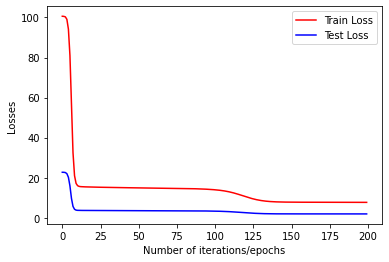

In [ ]:
#intial values
b = [0.01, 0.01]
b = np.array(b)
W = [[0.01,0.02],[0.01,0.02],[0.01,0.02]]
W = np.array(W)
w = [[0.01,0.02,0.03],[0.01,0.02,0.03]]
w = np.array(w)
c = [0.02,0.02,0.02]
c = np.array(c)
n = 0.1
epochs = 200
diff_train,diff_test = cal_test_train_loss(W,w,b,c,x_train,x_test,epochs,n)
print_loss(diff_train,diff_test,epochs)
print_graph(diff_train,diff_test,epochs)


# **Perform backpropagation using autograd and compare the results with previous part.**

In [ ]:
def forward_pass_loss(i,W,w,b,c):
  a1 = np.dot(i,W)+b  #1x2
  h = sigmoid(a1) #1x2
  a2 = np.dot(h,w)+c #1x3
  x = sigmoid(a2)  #1x3
  l = np.sum((i-x)**2)
  return l

In [ ]:
def update_weights(WW,ww,bb,cc,W_update,ww_update,b_update,c_update,n):
    w = ww - n * ww_update
    b = bb - n * b_update
    W = WW - n * W_update
    c = cc - n * c_update
    return W,w,b,c


In [ ]:
def cal_grad()

In [ ]:
def cal_grad_loss(WW,ww,bb,cc,x_train,x_test,epochs,n):
  gradient = grad(forward_pass_loss,(1,2,3,4))
  train = []
  test = []
  for j in range(epochs):
    train_loss = 0.0
    test_loss = 0.0
    for i in x_train:
      train_loss += forward_pass_loss(i,WW,ww,bb,cc) 
      W_update,ww_update,b_update,c_update = gradient(i,WW,ww,bb,cc)
      WW,ww,bb,cc = update_weights(WW,ww,bb,cc,W_update,ww_update,b_update,c_update,n)
    for i in x_test:
      test_loss += forward_pass_loss(i,WW,ww,bb,cc)
    train.append(train_loss)
    test.append(test_loss)
  return train,test
    


train loss : 98.36155999173266 , test_loss : 26.419468705042412
train loss : 98.31788352847082 , test_loss : 26.416761906332756
train loss : 98.12664891800331 , test_loss : 26.331201948229605
train loss : 97.00860256424312 , test_loss : 25.738255111783108
train loss : 92.1705566760851 , test_loss : 23.55566747850442
train loss : 79.50274767379985 , test_loss : 18.797543338686154
train loss : 57.396531965510235 , test_loss : 12.155653848829713
train loss : 35.603044650511826 , test_loss : 7.476329940382669
train loss : 23.73540012806695 , test_loss : 5.4092351444351285
train loss : 19.08661995717321 , test_loss : 4.62184179462628
train loss : 17.429147035869423 , test_loss : 4.315756125355376
train loss : 16.818081718062025 , test_loss : 4.183786938162689
train loss : 16.56462323492889 , test_loss : 4.118019257826345
train loss : 16.439513396468268 , test_loss : 4.080025082625339
train loss : 16.36546627660906 , test_loss : 4.05513638300767
train loss : 16.31457091240939 , test_loss : 4

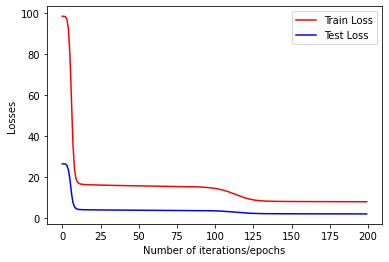

In [ ]:
#intial values
b = [0.01, 0.01]
b = np.array(b)
W = [[0.01,0.02],[0.01,0.02],[0.01,0.02]]
W = np.array(W)
w = [[0.01,0.02,0.03],[0.01,0.02,0.03]]
w = np.array(w)
c = [0.02,0.02,0.02]
c = np.array(c)
n = 0.1
epochs = 200
diff_train,diff_test = cal_grad_loss(W,w,b,c,x_train,x_test,epochs,n)
print_loss(diff_train,diff_test,epochs)
print_graph(diff_train,diff_test,epochs)